Importing essential Libraries

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;


Load the data using pandas

In [29]:
df = pd.read_csv('marketing_campaign_dataset.csv')
df.head(5)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


Data Exploration Analysis - EDA

In [3]:
df.shape

(200000, 16)

In [4]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [5]:
df.shape[0]

200000

Finding Missing Values if exist 

In [6]:
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [7]:
df.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [9]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [10]:
df.nunique()

Campaign_ID         200000
Company                  5
Campaign_Type            5
Target_Audience          5
Duration                 4
Channel_Used             6
Conversion_Rate         15
Acquisition_Cost     15001
ROI                    601
Location                 5
Language                 5
Clicks                 901
Impressions           9001
Engagement_Score        10
Customer_Segment         5
Date                   365
dtype: int64

 Data Cleaning

In [11]:
# Check duplicate record in the dataset
duplicated_data = df[df.duplicated()].sort_values('Campaign_ID', ascending=True)

# Show duplicate value
duplicated_data

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date


In [12]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

In [13]:
# Convert Campaign_ID column from float to object
df['Campaign_ID'] = df['Campaign_ID'].astype(str)

Skewness of Numeric Columns ( detect skewed distributions )

In [14]:
df.skew(numeric_only=True)

Conversion_Rate    -0.003411
ROI                -0.005043
Clicks              0.001423
Impressions        -0.004118
Engagement_Score    0.002551
dtype: float64

 Convert Date column

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0        2021-01-01
1        2021-01-02
2        2021-01-03
3        2021-01-04
4        2021-01-05
            ...    
199995   2021-12-07
199996   2021-12-08
199997   2021-12-09
199998   2021-12-10
199999   2021-12-11
Name: Date, Length: 200000, dtype: datetime64[ns]

In [17]:
# Clean and convert Acquisition_Cost to float
df["Acquisition_Cost"] = (
    df["Acquisition_Cost"]
    .astype(str)                          # make sure all entries are strings
    .str.replace(r"[^\d.]", "", regex=True)  # remove everything except digits and decimal
    .astype(float)                        # convert to float
)

In [18]:
df['Acquisition_Cost']

0         16174.0
1         11566.0
2         10200.0
3         12724.0
4         16452.0
           ...   
199995    18365.0
199996     8168.0
199997    13397.0
199998    18508.0
199999    13835.0
Name: Acquisition_Cost, Length: 200000, dtype: float64

Outliers (using IQR method)

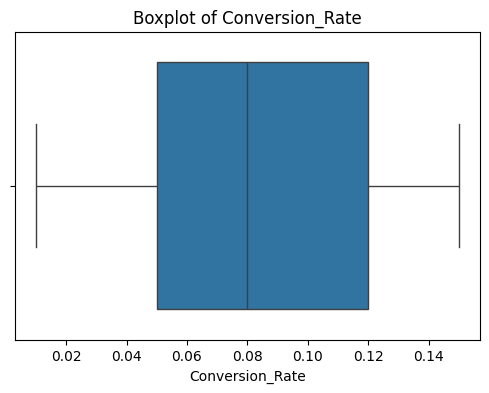

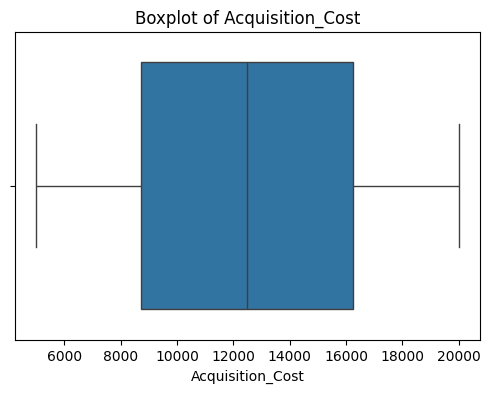

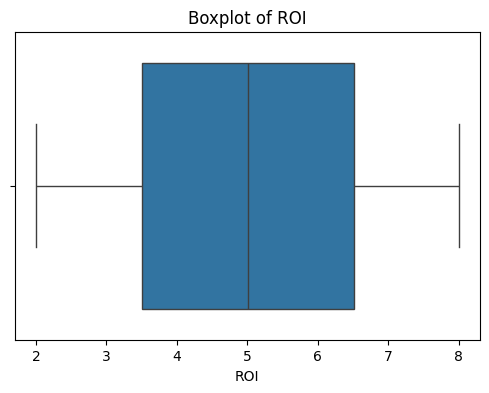

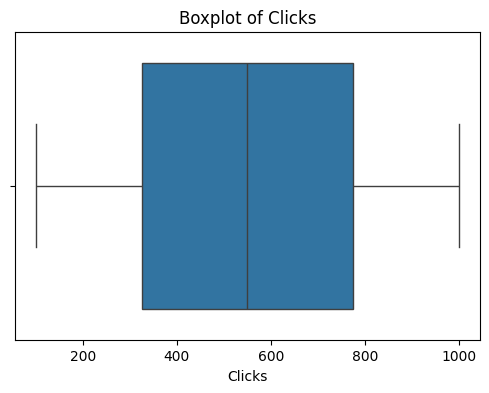

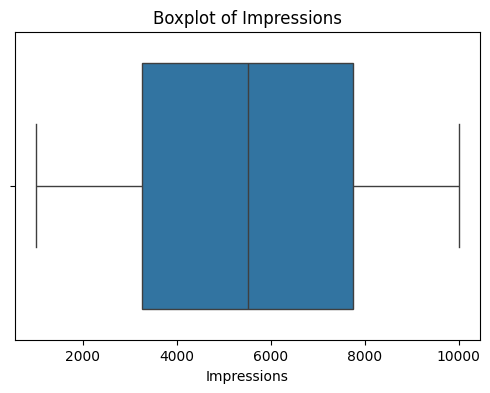

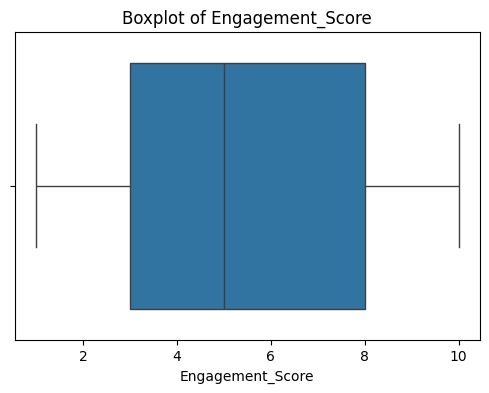

Outliers in Acquisition_Cost:
Empty DataFrame
Columns: [Campaign_ID, Acquisition_Cost]
Index: []


In [19]:
numeric_cols = ["Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Calculate IQR for Acquisition_Cost
Q1 = df["Acquisition_Cost"].quantile(0.25)
Q3 = df["Acquisition_Cost"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Acquisition_Cost"] < (Q1 - 1.5 * IQR)) | (df["Acquisition_Cost"] > (Q3 + 1.5 * IQR))]
print("Outliers in Acquisition_Cost:")
print(outliers[["Campaign_ID", "Acquisition_Cost"]])

# Occurrence of each channels

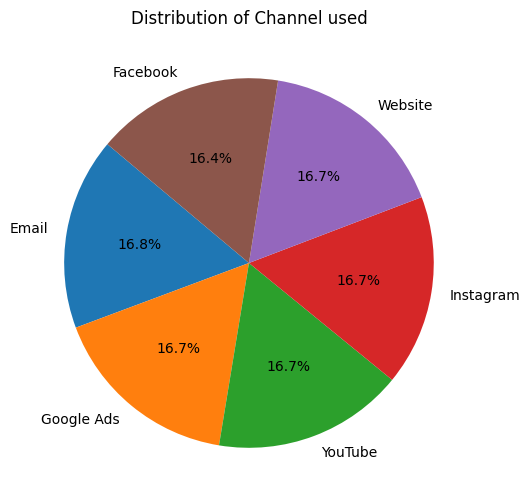

In [38]:
Channel_count = df['Channel_Used'].value_counts()

# visualise the channel used
plt.figure(figsize=(10,6))
plt.pie(Channel_count, labels=Channel_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Channel used')
plt.show()

c:\Users\dell\anaconda3\envs\pbasics\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


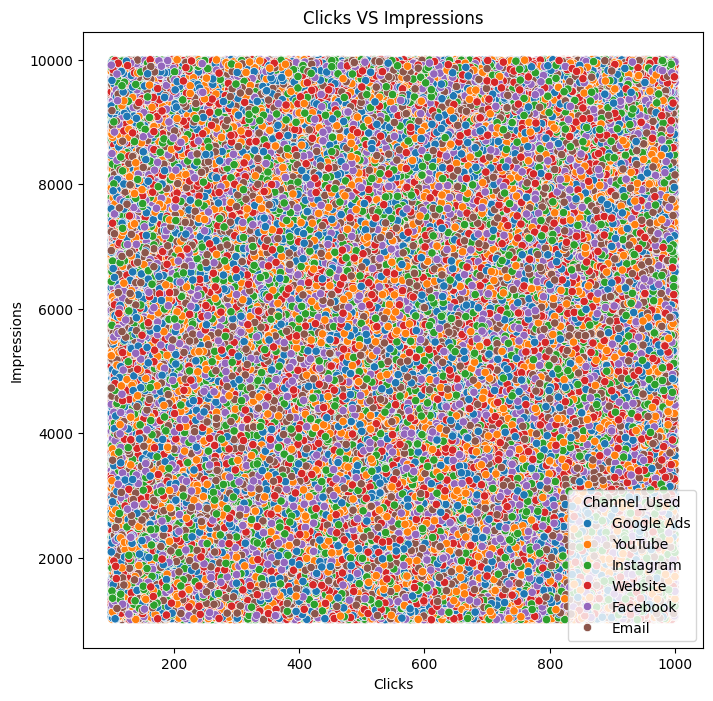

In [39]:
# Scatter plot of clicks vs impressions
plt.figure(figsize= (8,8))
sns.scatterplot(data=df, x='Clicks', y='Impressions', hue='Channel_Used')
plt.title('Clicks VS Impressions')
plt.show()

Compare Conversion rates across channels

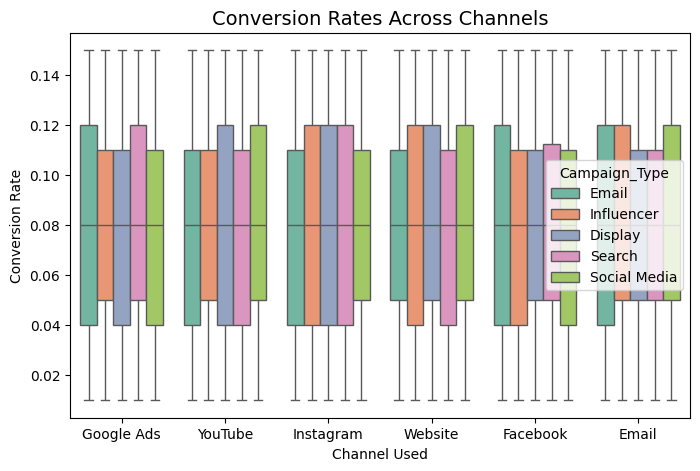

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Channel_Used", y="Conversion_Rate", data=df, hue="Campaign_Type", palette="Set2")
plt.title("Conversion Rates Across Channels", fontsize=14)
plt.xlabel("Channel Used")
plt.ylabel("Conversion Rate")
plt.show()

In [21]:
print(df.columns.tolist())

['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience', 'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Location', 'Language', 'Clicks', 'Impressions', 'Engagement_Score', 'Customer_Segment', 'Date']


In [22]:
# Clean Conversion_Rate (if needed)
df["Conversion_Rate"] = pd.to_numeric(df["Conversion_Rate"], errors="coerce")

In [23]:
df["Conversion_Rate"]

0         0.04
1         0.12
2         0.07
3         0.11
4         0.05
          ... 
199995    0.06
199996    0.02
199997    0.05
199998    0.10
199999    0.01
Name: Conversion_Rate, Length: 200000, dtype: float64

In [24]:
df["Campaign_ID"] = df["Campaign_ID"].astype(str)

Customer segments most responsive

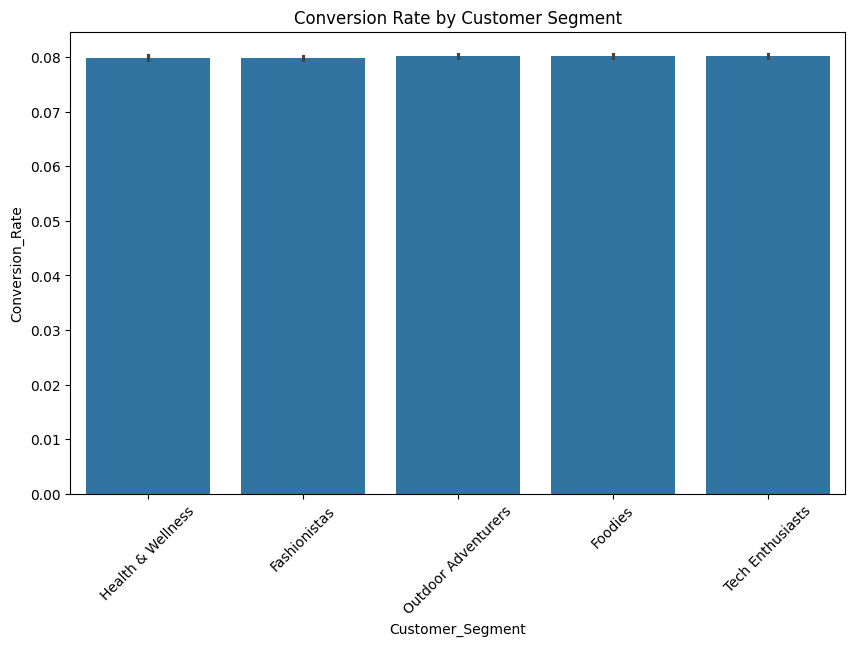

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Customer_Segment", y="Conversion_Rate")
plt.title("Conversion Rate by Customer Segment")
plt.xticks(rotation=45)
plt.show()

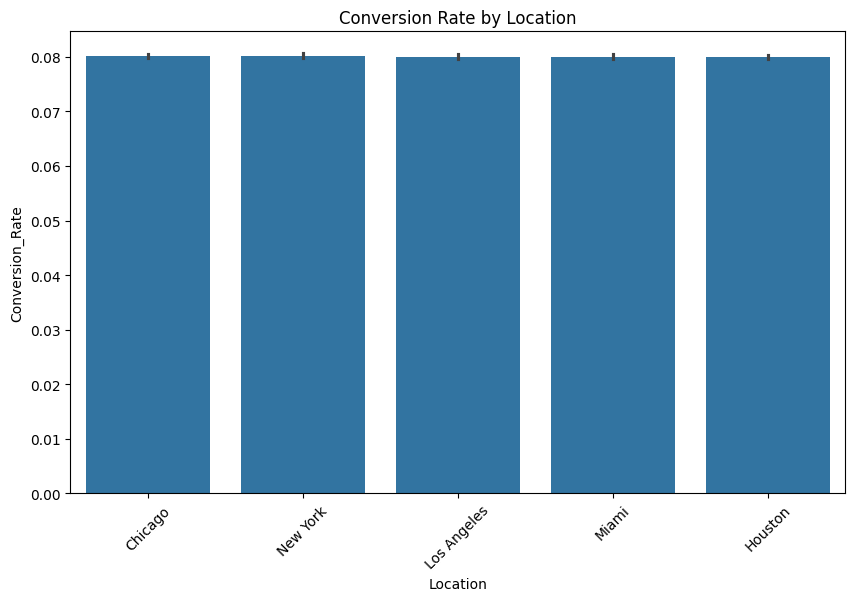

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Location", y="Conversion_Rate", estimator="mean")
plt.title("Conversion Rate by Location")
plt.xticks(rotation=45)
plt.show()

# 3. Channel effectiveness

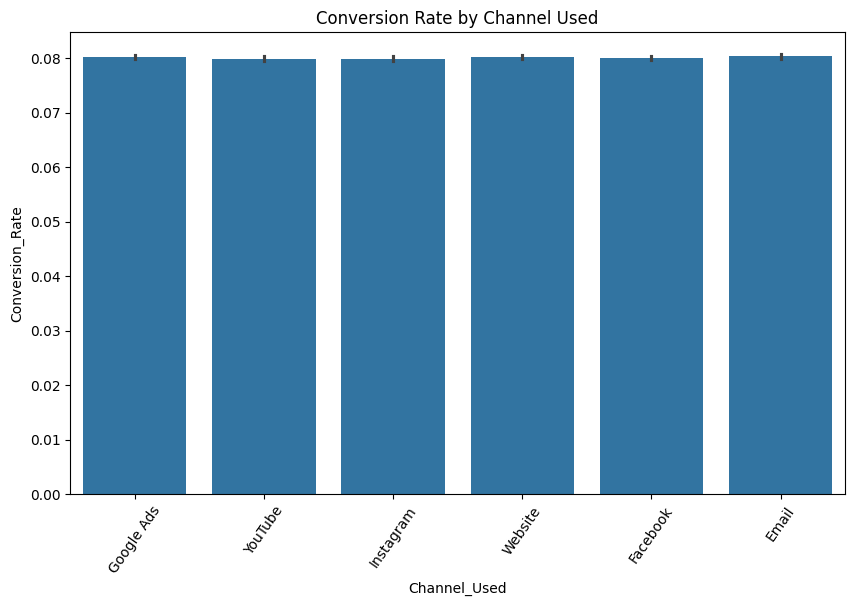

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Channel_Used", y="Conversion_Rate")
plt.title("Conversion Rate by Channel Used")
plt.xticks(rotation = 55)
plt.show()

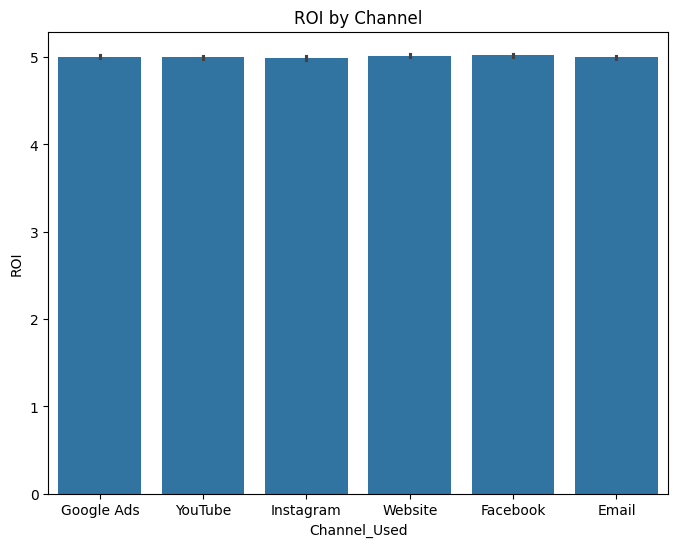

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Channel_Used", y="ROI", estimator="mean")
plt.title("ROI by Channel")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_10704\3964037194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer_Segment', order=order, palette='Set2')


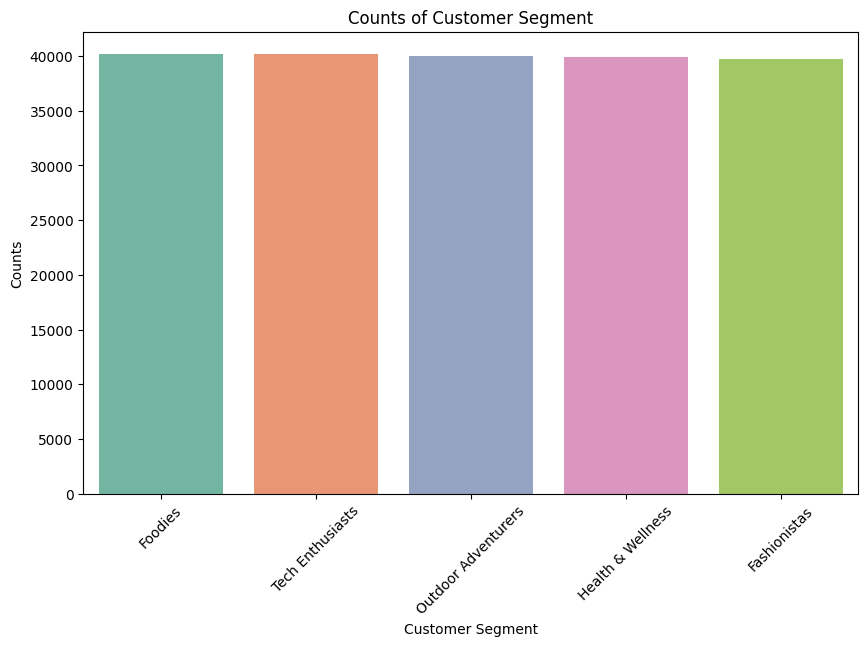

In [50]:
# Barplot of Customer Segment counts

plt.figure(figsize=(10,6))
order = df['Customer_Segment'].value_counts().index
sns.countplot(data=df, x='Customer_Segment', order=order, palette='Set2')
plt.title('Counts of Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group data by location and calculate the average conversion rate
location_conversion = df.groupby('location')['Conversion_Rate'].mean().reset_index()

# Map plot using the average conversion Rate

plt.figure(figsize=(10,6))
sns.barplot(data=location_conversion, x ='location', y ='Conversion_Rate')
plt.title('Average Conversion Rate by Location')
plt.xlabel('Location')  
plt.ylabel('Average Conversion Rate')
plt.show()